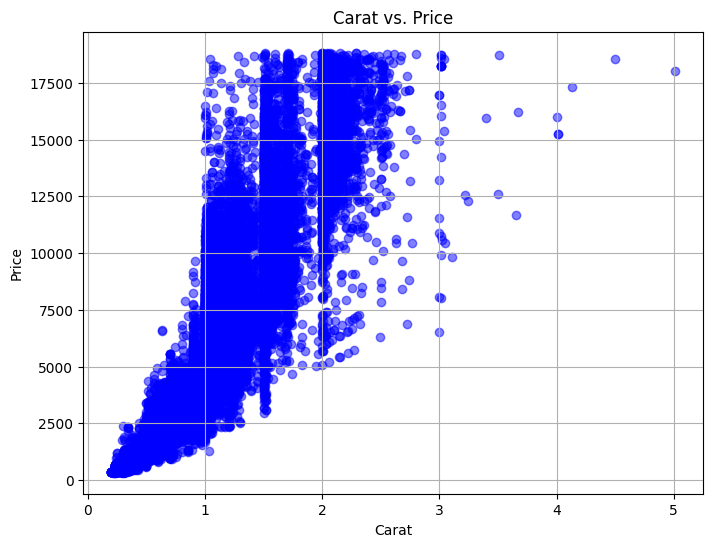

In [ ]:
# Part 1 - Regression

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, SGDRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.svm import SVR, LinearSVR
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import seaborn as sns
import matplotlib.pyplot as plt
import time
import warnings

# Ignore warnings
warnings.filterwarnings("ignore")

# Load Data
diamonds_df = pd.read_csv("Ass4Data/Part 1 - regression/diamonds.csv")
diamonds_df = pd.get_dummies(diamonds_df, columns=["cut", "color", "clarity"], drop_first=True)

# Perform EDA and create visualizations to understand the data

# Extract 'carat' and 'price' columns from the dataset
carat_data = diamonds_df['carat']
price_data = diamonds_df['price']

# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(carat_data, price_data, alpha=0.5, color='b')
plt.xlabel('Carat')
plt.ylabel('Price')
plt.title('Carat vs. Price')
plt.grid(True)

# Show the plot
plt.show()

# Split Data into Training and Test Sets
X = diamonds_df.iloc[:, :-1]  # Features (input variables)
y = diamonds_df["price"]      # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=309)

# Build Regression Models
models = {
    "Linear Regression": LinearRegression(),
    "K-Neighbors Regression": KNeighborsRegressor(),
    "Ridge Regression": Ridge(),
    "Decision Tree Regression": DecisionTreeRegressor(),
    "Random Forest Regression": RandomForestRegressor(),
    "Gradient Boosting Regression": GradientBoostingRegressor(),
    "SGD Regression": SGDRegressor(),
    "Support Vector Regression": SVR(),
    "Linear SVR": LinearSVR(),
    "Multi-layer Perceptron Regression": MLPRegressor()
}

results = []

for model_name, model in models.items():
    start_time = time.time()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    end_time = time.time()

    mse = mean_squared_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    rse = mse / ((y_test - y_test.mean()) ** 2).mean()
    mae = mean_absolute_error(y_test, y_pred)
    execution_time = end_time - start_time

    results.append([model_name, mse, rmse, rse, mae, execution_time])

# Report Results
results_df = pd.DataFrame(results, columns=["Model", "MSE", "RMSE", "RSE", "MAE", "Execution Time"])
print(results_df)